In [1]:
from diff_calc import mathLexer
from diff_parse import mathParser
from IPython.display import display

Parser debugging for mathParser written to parser.out


In [2]:
expression = "def bol(x) {x+1} def sol(x) {sin(x)+1+2} {diff x} {bol(2*x)+1+2*x} sin(x)+cos(x)"

# как добавить diff_arg в код, и как считывать его
# нужно ли обрабатывать нули и 1 и где это делать

In [3]:
lexer  = mathLexer()
parser = mathParser()

In [4]:
for token in lexer.tokenize(expression):
    print(token)

Token(type='DEF', value='def', lineno=1, index=0)
Token(type='ID', value='bol', lineno=1, index=4)
Token(type='(', value='(', lineno=1, index=7)
Token(type='ID', value='x', lineno=1, index=8)
Token(type=')', value=')', lineno=1, index=9)
Token(type='{', value='{', lineno=1, index=11)
Token(type='ID', value='x', lineno=1, index=12)
Token(type='PLUS', value='+', lineno=1, index=13)
Token(type='NUMBER', value=1, lineno=1, index=14)
Token(type='}', value='}', lineno=1, index=15)
Token(type='DEF', value='def', lineno=1, index=17)
Token(type='ID', value='sol', lineno=1, index=21)
Token(type='(', value='(', lineno=1, index=24)
Token(type='ID', value='x', lineno=1, index=25)
Token(type=')', value=')', lineno=1, index=26)
Token(type='{', value='{', lineno=1, index=28)
Token(type='SIN', value='sin', lineno=1, index=29)
Token(type='(', value='(', lineno=1, index=32)
Token(type='ID', value='x', lineno=1, index=33)
Token(type=')', value=')', lineno=1, index=34)
Token(type='PLUS', value='+', lineno=

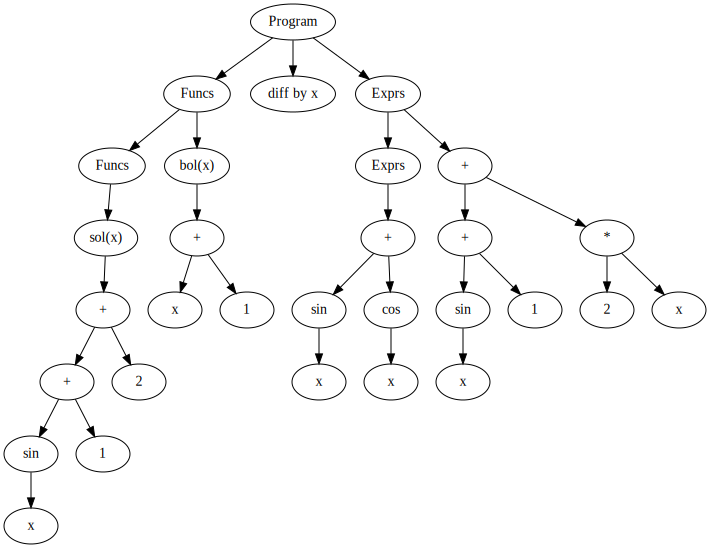

In [5]:
result = parser.parse(lexer.tokenize(expression))
result.dot

In [7]:
result.exprs.expr.funcs

{'bol': <ast_nodes.Func at 0x186b820>, 'sol': <ast_nodes.Func at 0x186bda8>}

In [8]:
result.funcs.func

In [6]:
result.to_python_expr()

AttributeError: 'Program' object has no attribute 'to_python_expr'

In [7]:
result.differentiate_expr()

'(1+2)'

In [8]:
"def orig(x): return " + result.to_python_expr()

'def orig(x): return ((x+1)+(2*x))'

In [9]:
"def diff(x): return " + result.to_python_expr()

'def diff(x): return ((x+1)+(2*x))'

In [10]:
# from file import f
# from file2 import diff